In [74]:
import re
import glob
import msgpack
import pandas as pd
import numpy as np
import numba as nb
import seaborn as sns
import itertools
from collections import defaultdict
import importlib # for reloading modules
pd.set_option('display.max_columns', None) # show all columns
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

# conda install pytorch-lightning -c conda-forge
from torch import nn
import torch
print(torch.__version__)

# from tqdm.notebook import tqdm
# import tensorflow as tf
import tensorboard as tb

1.7.1


https://www.tensorflow.org/tensorboard/dataframe_api

`tensorboard dev upload --logdir <logdir>`

In [75]:
# https://tensorboard.dev/experiment/tam1ajndRyG5W0D4pm1sXQ/
# https://tensorboard.dev/experiment/28ntPZXBTWmXGAaW9GrjOA/
experiment_id = "K7ksM5SgSoqroVo2BNnWYQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_ = experiment.get_scalars(pivot=True)

In [76]:
df = df_.copy()
# print(df["tag"].unique())

In [77]:
print(df["run"].unique())

['soft@1_internal@1_num@128_loc@all_trial@0'
 'soft@1_internal@1_num@128_loc@all_trial@1'
 'soft@1_internal@1_num@128_loc@all_trial@2'
 'soft@1_internal@1_num@128_loc@bone_trial@0'
 'soft@1_internal@1_num@128_loc@bone_trial@1'
 'soft@1_internal@1_num@128_loc@bone_trial@2'
 'soft@1_internal@1_num@128_loc@skin_trial@0'
 'soft@1_internal@1_num@128_loc@skin_trial@1'
 'soft@1_internal@1_num@128_loc@skin_trial@2'
 'soft@1_internal@2_num@128_loc@all_trial@0'
 'soft@1_internal@2_num@128_loc@all_trial@1'
 'soft@1_internal@2_num@128_loc@all_trial@2'
 'soft@1_internal@2_num@128_loc@bone_trial@0'
 'soft@1_internal@2_num@128_loc@bone_trial@1'
 'soft@1_internal@2_num@128_loc@bone_trial@2'
 'soft@1_internal@2_num@128_loc@skin_trial@0'
 'soft@1_internal@2_num@128_loc@skin_trial@1'
 'soft@1_internal@2_num@128_loc@skin_trial@2'
 'soft@1_internal@4_num@128_loc@all_trial@0'
 'soft@1_internal@4_num@128_loc@all_trial@1'
 'soft@1_internal@4_num@128_loc@all_trial@2'
 'soft@1_internal@4_num@128_loc@bone_trial@

In [78]:
tags = pd.DataFrame.from_dict([dict([ t.split("@") for t in s.split("_")]) for s in df.run])
df = pd.concat([df_,tags],axis=1)
df["experiment"] = df_.run.str.rsplit("_",n=1,expand=True)[0]
# convert to numeric if available
for col in df.columns:
    try:
        df[col] = df[col].apply(pd.to_numeric)
    except Exception:
        pass
df

run    step  \
0     soft@1_internal@1_num@128_loc@all_trial@0    4000   
1     soft@1_internal@1_num@128_loc@all_trial@0    8000   
2     soft@1_internal@1_num@128_loc@all_trial@0   12000   
3     soft@1_internal@1_num@128_loc@all_trial@0   16000   
4     soft@1_internal@1_num@128_loc@all_trial@0   20000   
...                                         ...     ...   
4120  soft@1_internal@4_num@64_loc@skin_trial@2  484000   
4121  soft@1_internal@4_num@64_loc@skin_trial@2  488000   
4122  soft@1_internal@4_num@64_loc@skin_trial@2  492000   
4123  soft@1_internal@4_num@64_loc@skin_trial@2  496000   
4124  soft@1_internal@4_num@64_loc@skin_trial@2  500000   

      avg_episode_length/train  avg_episode_reward/train  soft  internal  num  \
0                   168.800003                210.229492     1         1  128   
1                   172.199997                214.630981     1         1  128   
2                   182.000000                227.366928     1         1  128   
3                   194.800003                244.002274     1         1  128   
4                   186.600006                233.185059     1         1  128   
...                        ...                       ...   ...       ...  ...   
4120                732.599976                934.600586     1         4   64   
4121                857.599976               1095.004517     1         4   64   
4122                877.200012               1125.678345     1         4   64   
4123                654.400024                838.827576     1         4   64   
4124                763.400024                981.747803     1         4   64   

       loc  trial                         experiment  
0      all      0  soft@1_internal@1_num@128_loc@all  
1      all      0  soft@1_internal@1_num@128_loc@all  
2      all      0  soft@1_internal@1_num@128_loc@all  
3      all      0  soft@1_internal@1_num@128_loc@all  
4      all      0  soft@1_internal@1_num@128_loc@all  
...    ...    ...                                ...  
4120  skin      2  soft@1_internal@4_num@64_loc@skin  
4121  skin      2  soft@1_internal@4_num@64_loc@skin  
4122  skin      2  soft@1_internal@4_num@64_loc@skin  
4123  skin      2  soft@1_internal@4_num@64_loc@skin  
4124  skin      2  soft@1_internal@4_num@64_loc@skin  

[4125 rows x 10 columns]

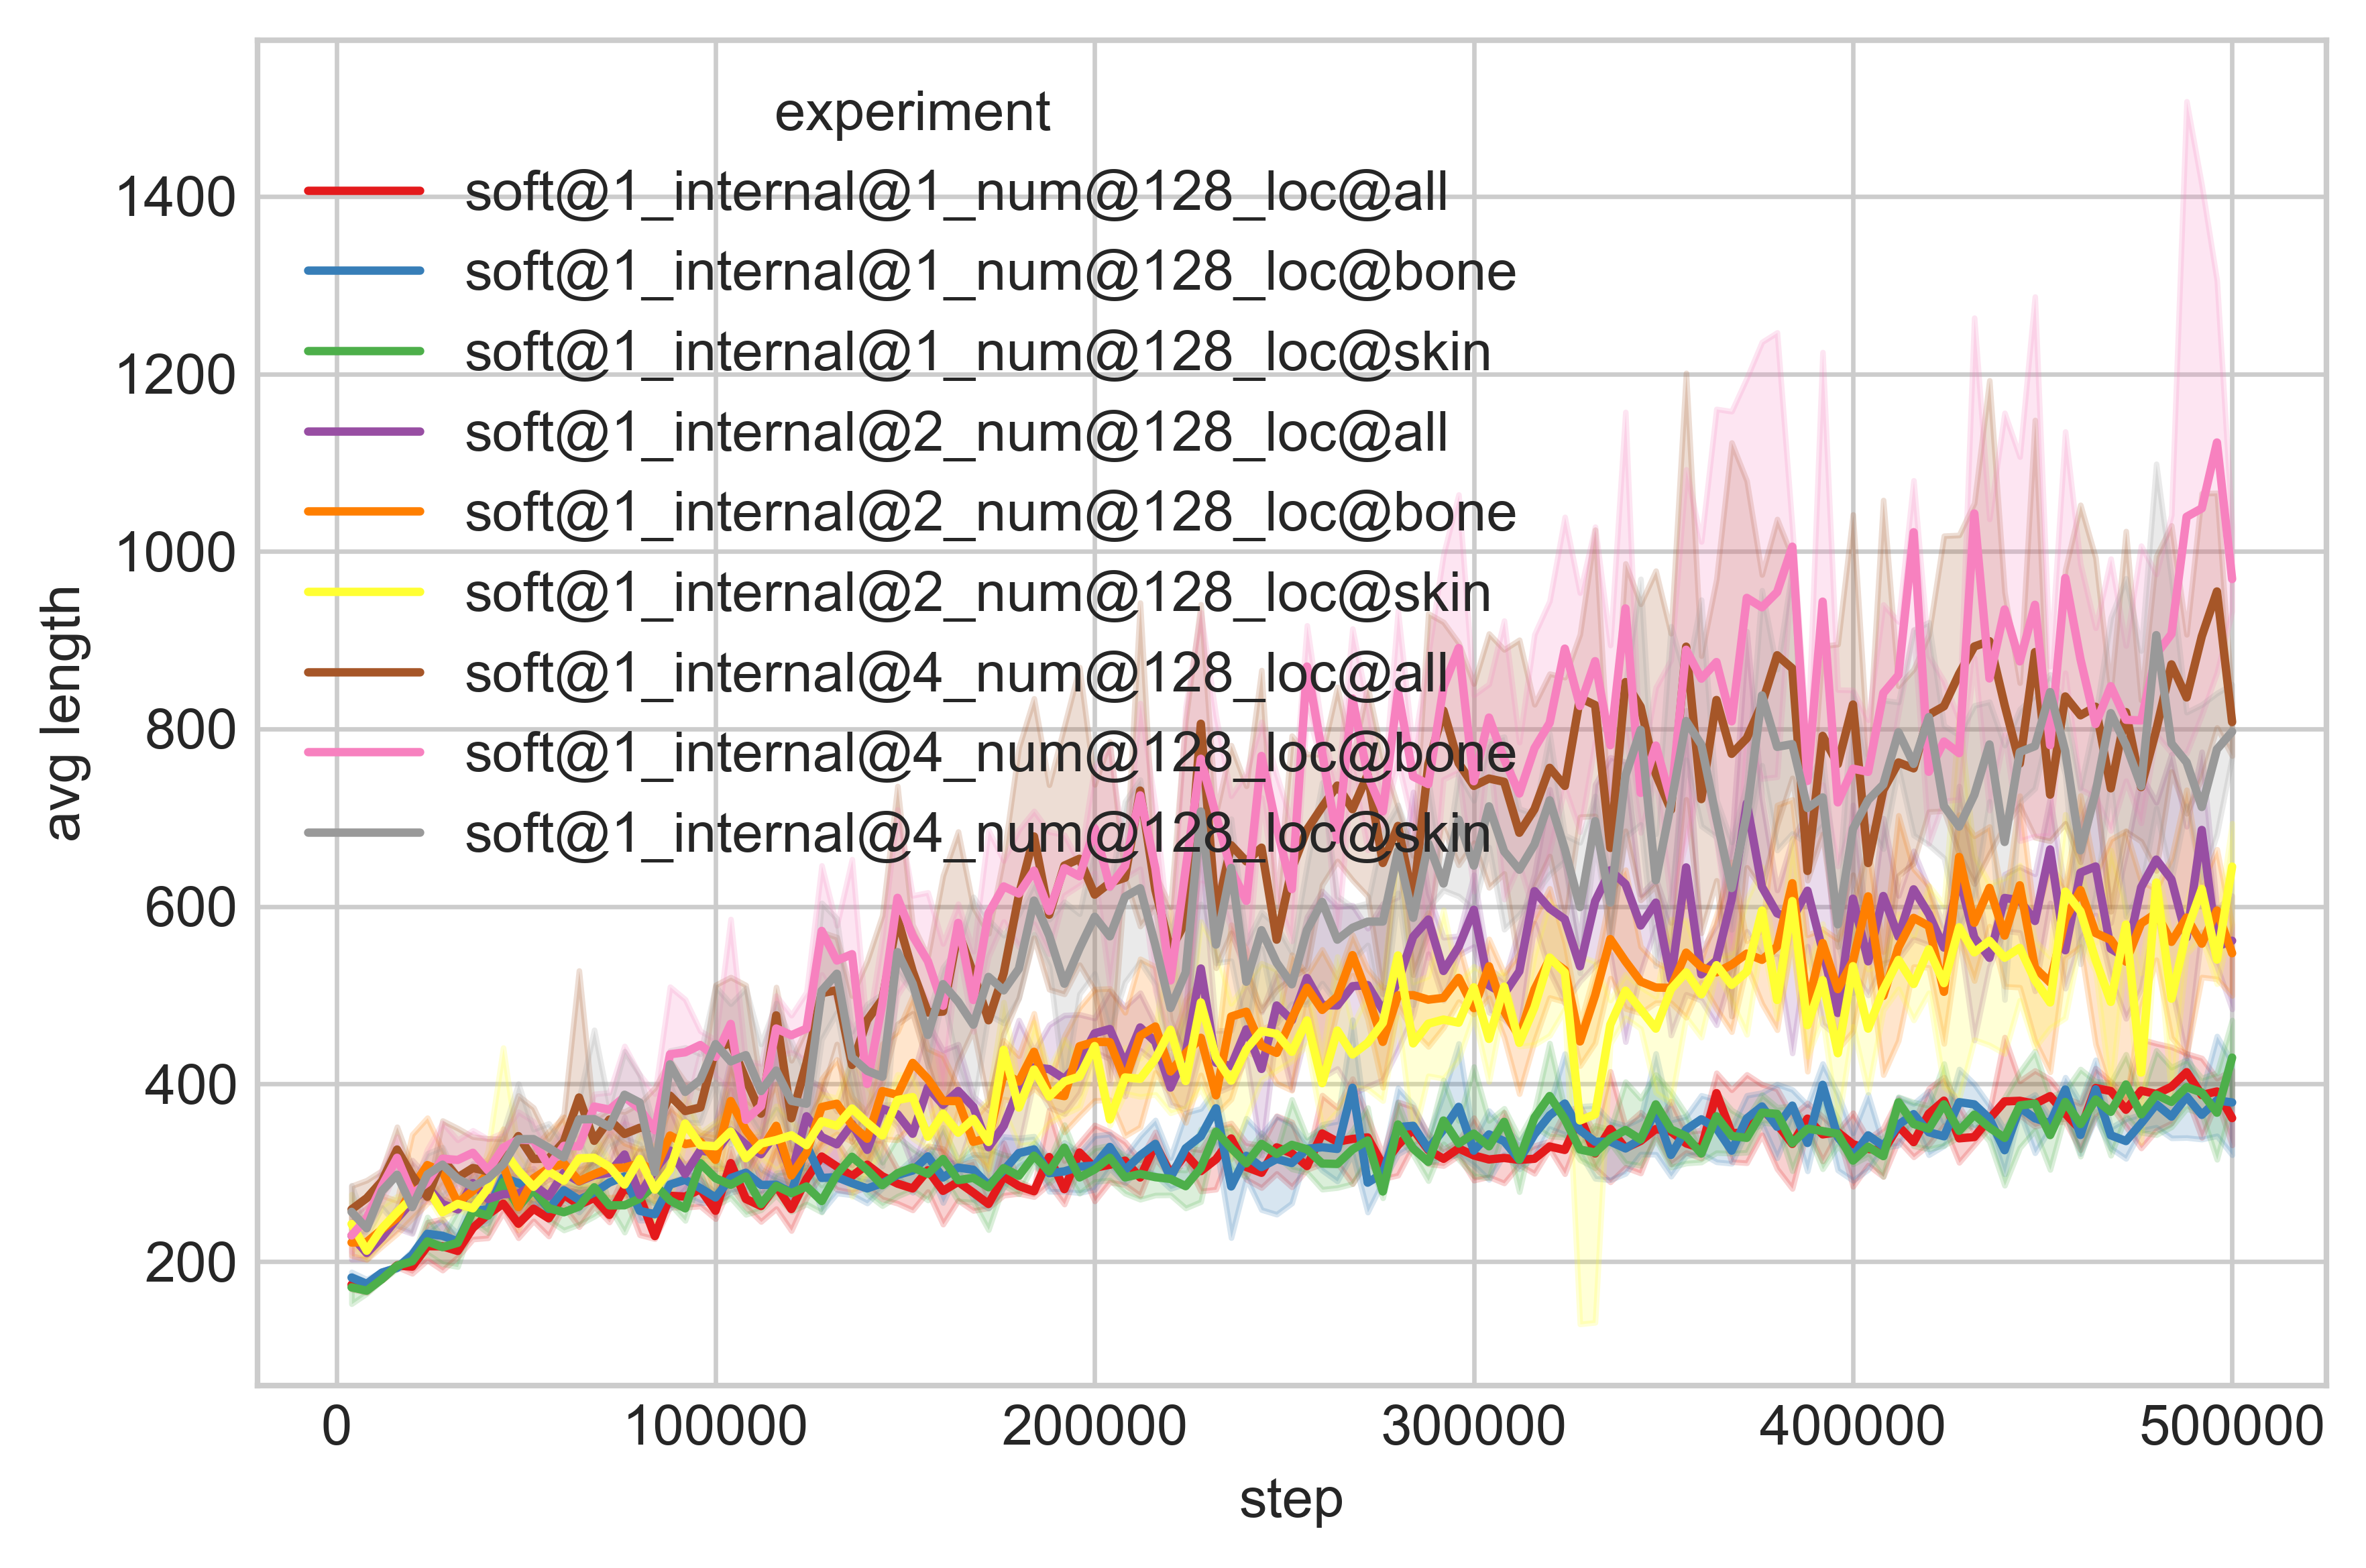

In [82]:
plt.figure(dpi=300)
ax = sns.lineplot(data=df[df.num==128],x="step",y = "avg_episode_length/train",hue = "experiment",palette="Set1")
ax.set_ylabel("avg length")
plt.tight_layout()
plt.savefig("runs/result_all.png")

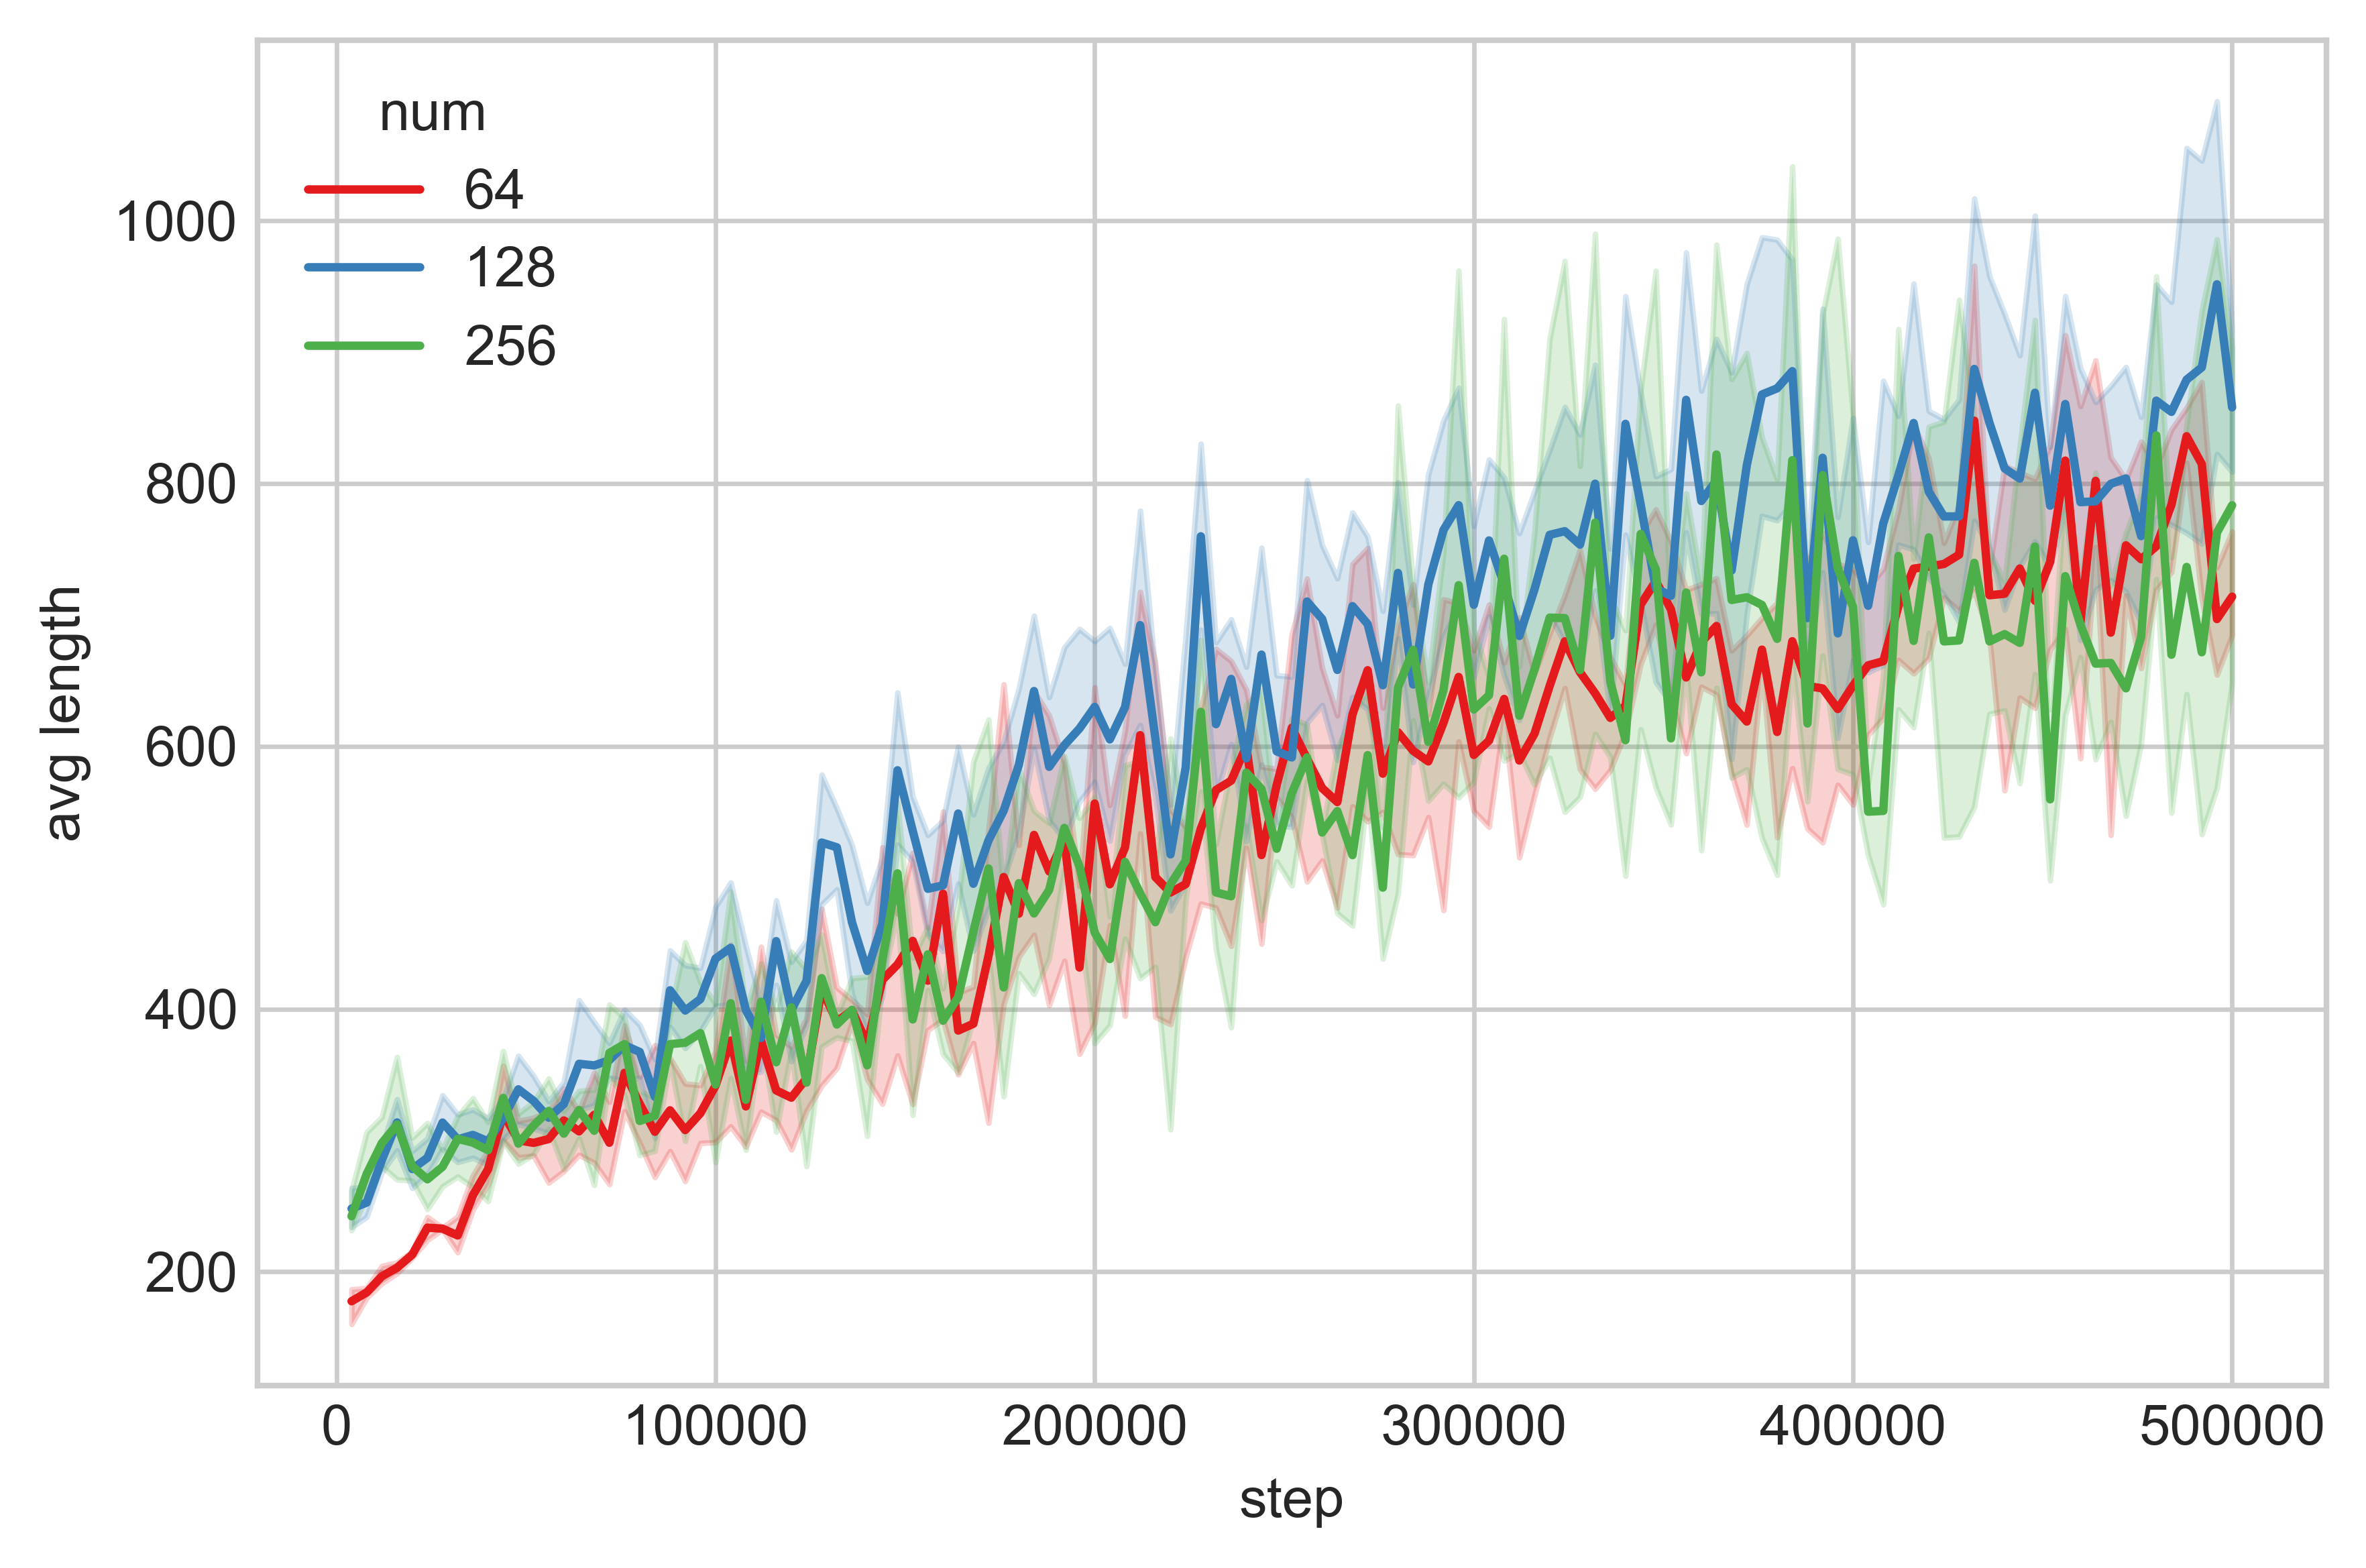

In [80]:
plt.figure(dpi=300)
ax = sns.lineplot(data=df[df.internal==4],x="step",y = "avg_episode_length/train",hue = "num",palette="Set1")
ax.set_ylabel("avg length")
plt.tight_layout()
plt.savefig("runs/result_num_spring_strain.png")

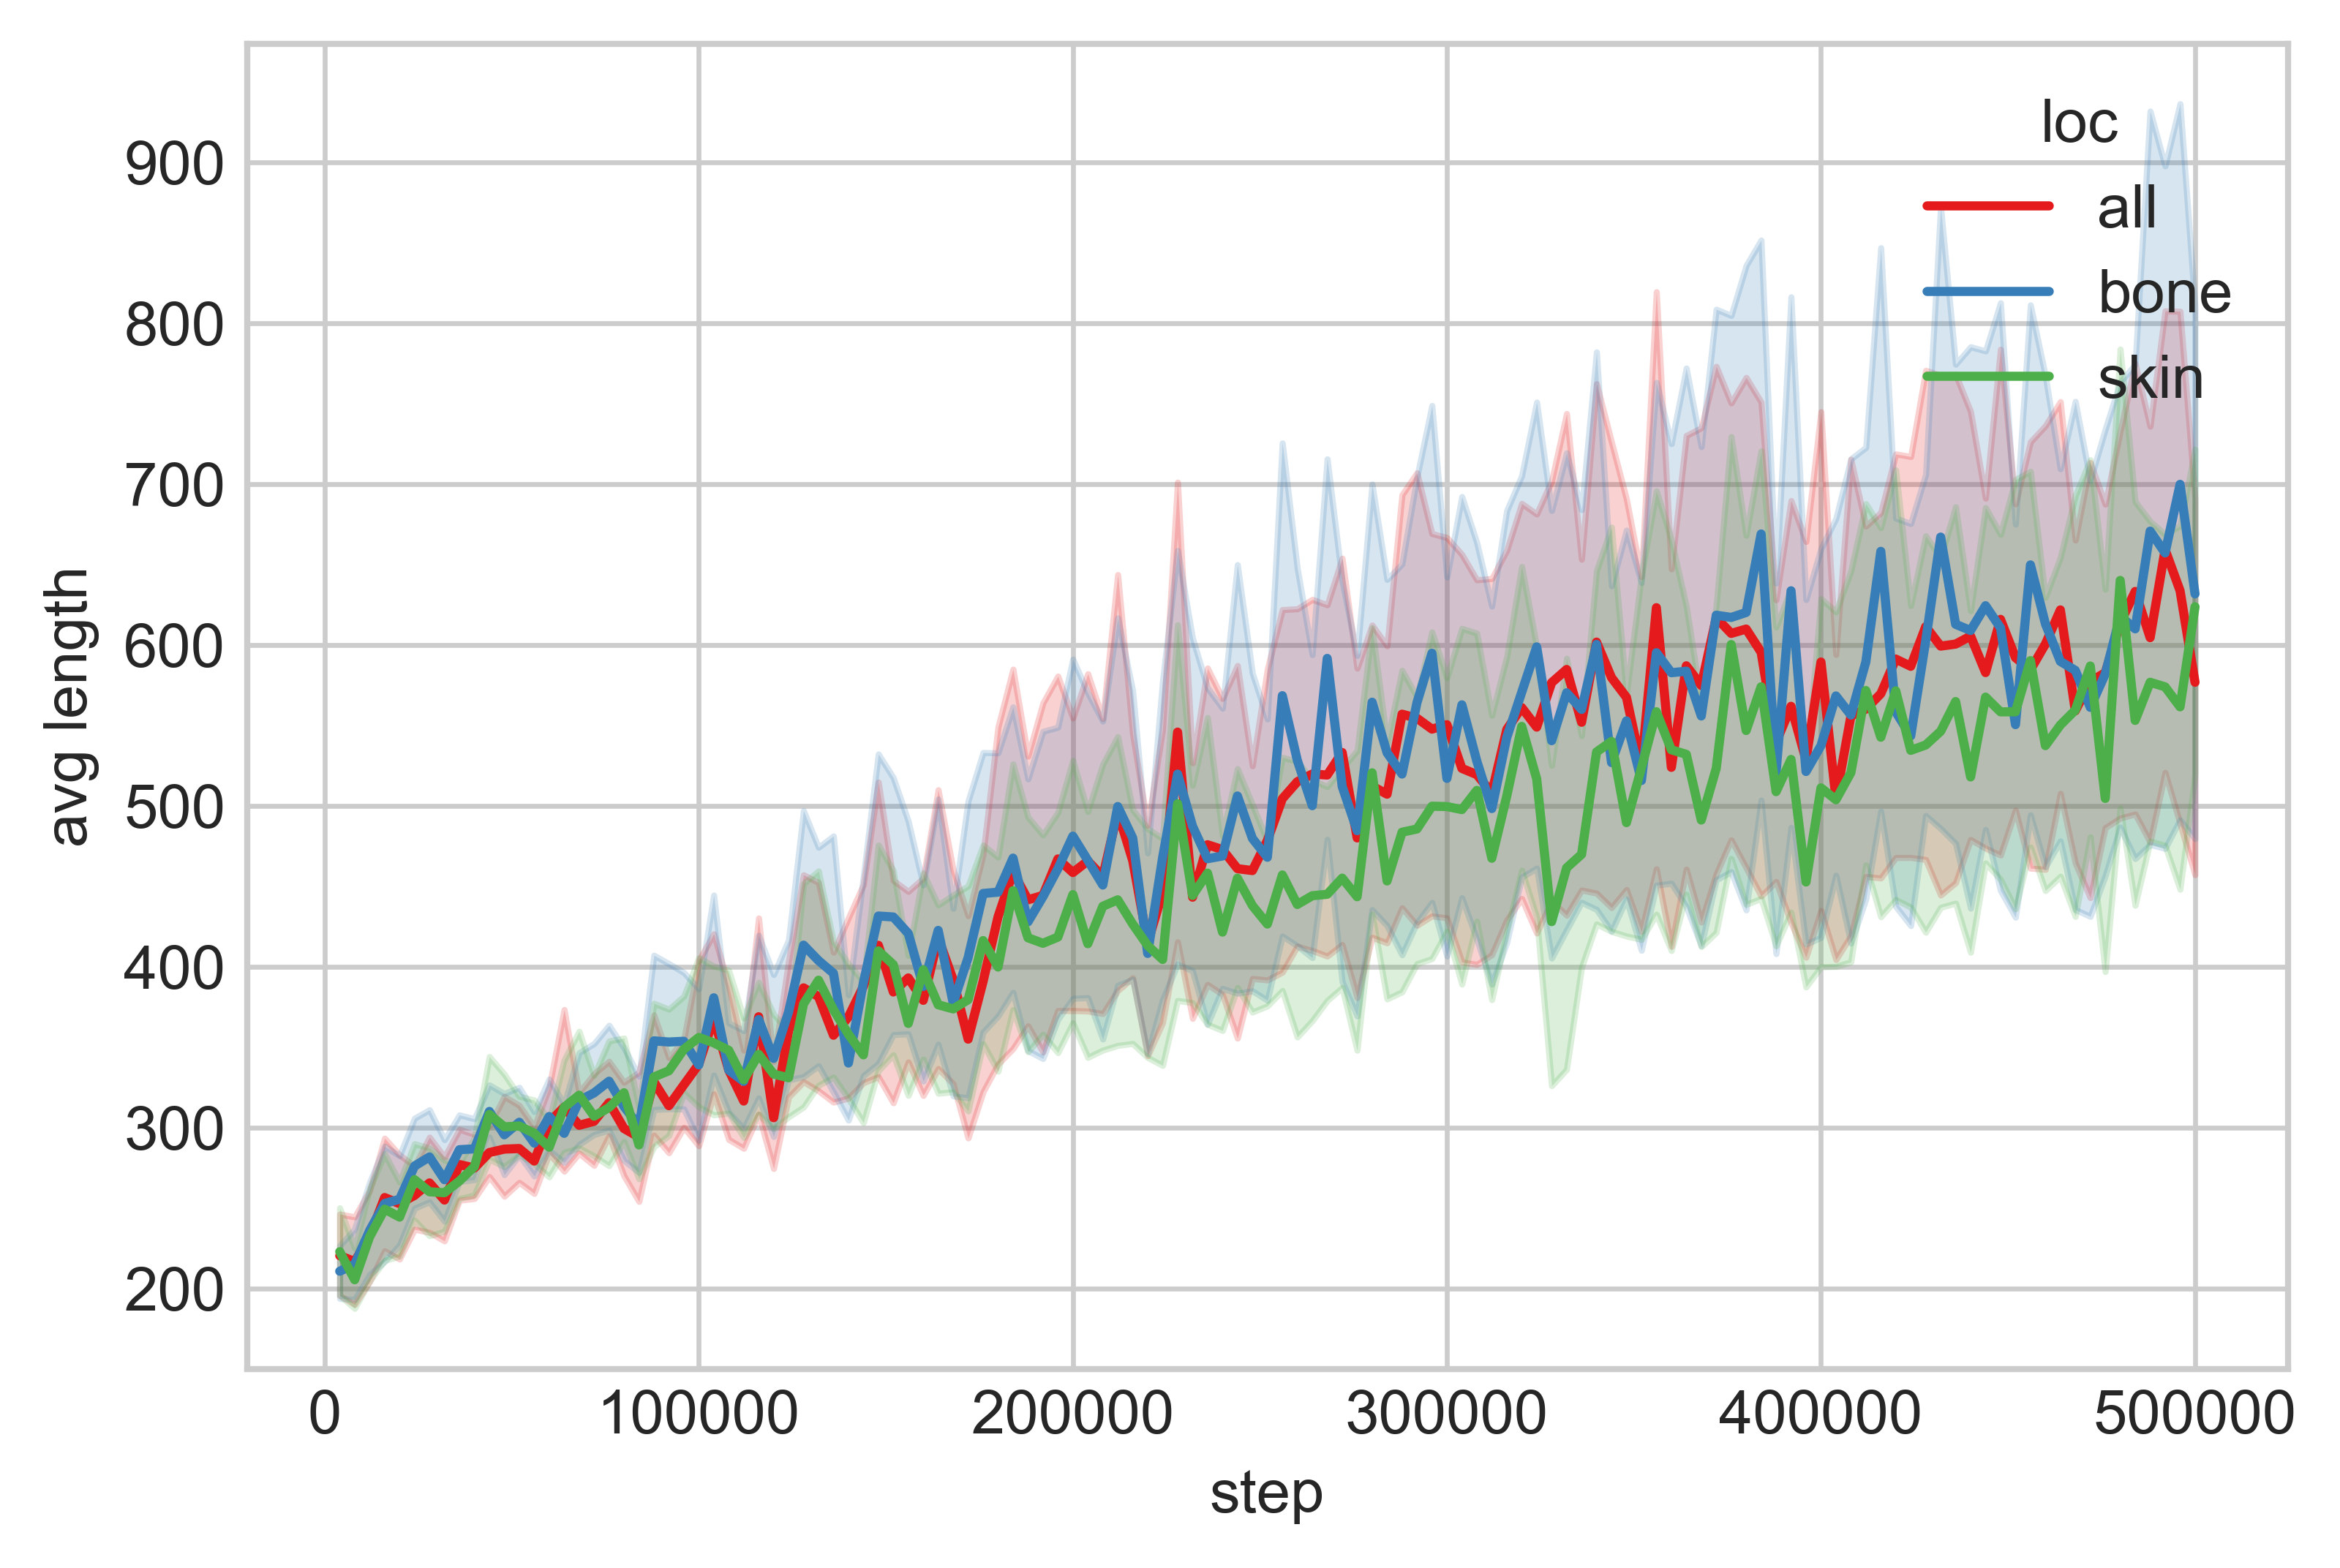

In [81]:
plt.figure(dpi=300)
ax = sns.lineplot(data=df[df.num==128],x="step",y = "avg_episode_length/train",hue = "loc",palette="Set1")
ax.set_ylabel("avg length")
plt.savefig("runs/result_loc.png")